# Laboratory 3 Spatial Transforms and Filtering

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from time import time

# plt.style.use('default')

## Import Images

In [3]:
img1_1 = cv2.cvtColor(cv2.imread('Q3_1_1.tif'), cv2.COLOR_RGB2GRAY)
img1_2 = cv2.cvtColor(cv2.imread('Q3_1_2.tif'), cv2.COLOR_RGB2GRAY)
img2 = cv2.cvtColor(cv2.imread('Q3_2.tif'), cv2.COLOR_RGB2GRAY)
img3 = cv2.cvtColor(cv2.imread('Q3_3.tif'), cv2.COLOR_RGB2GRAY)
img4 = cv2.cvtColor(cv2.imread('Q3_4.tif'), cv2.COLOR_RGB2GRAY)

## Test for Histogram

In [4]:
def hist(arr, _min=0, _max=255, parallel=1):
    """
    Use a tricky method with the efficient numpy. Avoid using for loop twice to iterate the image, because it is slow!

    :param parallel: 0 means that arr is single image or array, otherwise it is an array of multiple images or arrays
    :param arr: the input image or array
    :param _min: minimum value of arr
    :param _max: maximum value of arr
    :return: histogram bins with size of (parallel x _max - _min + 1)
    """
    _hist = None
    if parallel == 1:
        _hist = np.zeros(_max - _min + 1)
        for v in range(_min, _max + 1):
            _hist[v] = np.sum(arr == v)
    else:
        _hist = np.zeros((parallel, _max - _min + 1))
        for v in range(_min, _max + 1):
            _hist[:, v] = np.sum(arr == v, axis=1)
    return _hist

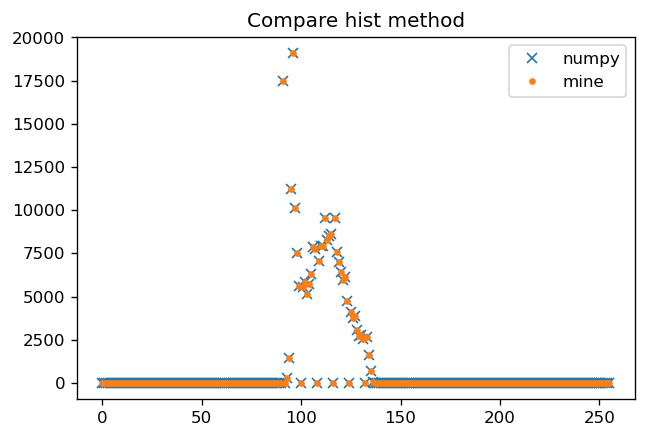

In [5]:
plt.figure(dpi=120)
np_hist = np.histogram(img1_1.ravel(), 256, [0, 256])
my_hist = hist(img1_1.ravel(), _min=0, _max=255)

plt.plot(np_hist[0], 'x', label='numpy')
plt.plot(my_hist, '.', label='mine')
plt.title('Compare hist method')
plt.legend()


## Histogram Equalization

In [6]:
# Q3_1_1.tif and Q3_1_2.tif

def hist_equ(arr, local=False):
    """
    Implement histogram equalization

    :param local: means whether calculate in parallel style
    :param arr: the input image or array
    :return: output image, output histogram bins, input histogram bins
    """
    if not local:
        input_hist = hist(arr.ravel())
        r_pdf = np.array(input_hist) / np.sum(input_hist)
        r_cdf = np.round(255 * np.cumsum(r_pdf))
        output_image = np.zeros_like(arr)
        for idx in range(256):
            output_image[arr == idx] = r_cdf[idx]
        output_hist = hist(output_image.ravel())
        return output_image, output_hist, input_hist
    else:
        _parallel = arr.shape[0]  # number of neighbors
        _m2 = arr.shape[1]  # size of neighbors, m^2
        _half = _m2 // 2
        input_hist = hist(arr, parallel=_parallel)
        r_pdf = input_hist / _m2
        r_cdf = np.round(255 * np.cumsum(r_pdf, axis=1))
        output_image = np.zeros(_parallel)
        center_pixel = arr[:, _m2 // 2].astype(int)
        for i in range(_parallel):
            output_image[i] = r_cdf[i, center_pixel[i]]
        return output_image

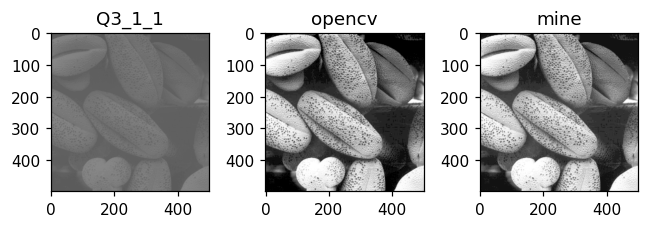

In [7]:
star = time()
out1_1 = hist_equ(img1_1)
end = time()
out1_1_cv = cv2.equalizeHist(img1_1)

plt.figure(dpi=110)

plt.subplot(1, 3, 1)
plt.imshow(img1_1, cmap='gray', vmin=0, vmax=255)
plt.title('Q3_1_1')
plt.subplot(1, 3, 2)
plt.imshow(out1_1_cv, cmap='gray', vmin=0, vmax=255)
plt.title('opencv')
plt.subplot(1, 3, 3)
plt.imshow(out1_1[0], cmap='gray', vmin=0, vmax=255)
plt.title('mine')

plt.tight_layout()
plt.show()

In [8]:
print('time:', end - star)

time: 0.22960257530212402


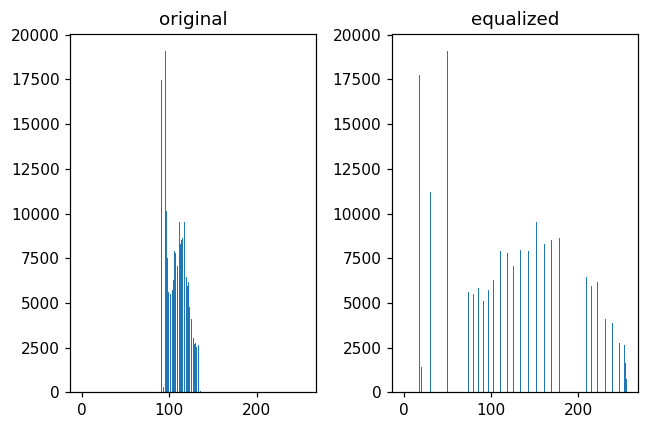

In [9]:
plt.figure(dpi=110)

plt.subplot(1, 2, 1)
plt.bar(range(len(out1_1[2])), out1_1[2])
plt.title('original')
plt.subplot(1, 2, 2)
plt.bar(range(len(out1_1[1])), out1_1[1])
plt.title('equalized')

plt.tight_layout()
plt.show()

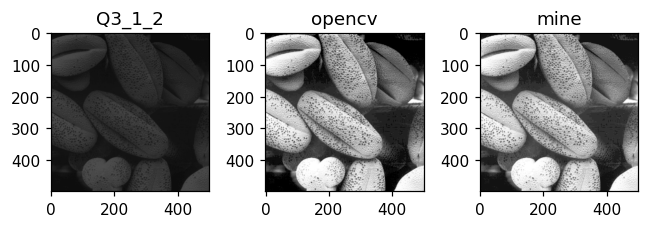

In [10]:
star = time()
out1_2 = hist_equ(img1_2)
end = time()
out1_2_cv = cv2.equalizeHist(img1_2)

plt.figure(dpi=110)

plt.subplot(1, 3, 1)
plt.imshow(img1_2, cmap='gray', vmin=0, vmax=255)
plt.title('Q3_1_2')
plt.subplot(1, 3, 2)
plt.imshow(out1_2_cv, cmap='gray', vmin=0, vmax=255)
plt.title('opencv')
plt.subplot(1, 3, 3)
plt.imshow(out1_2[0], cmap='gray', vmin=0, vmax=255)
plt.title('mine')

plt.tight_layout()
plt.show()

In [11]:
print('time:', end - star)

time: 0.23404693603515625


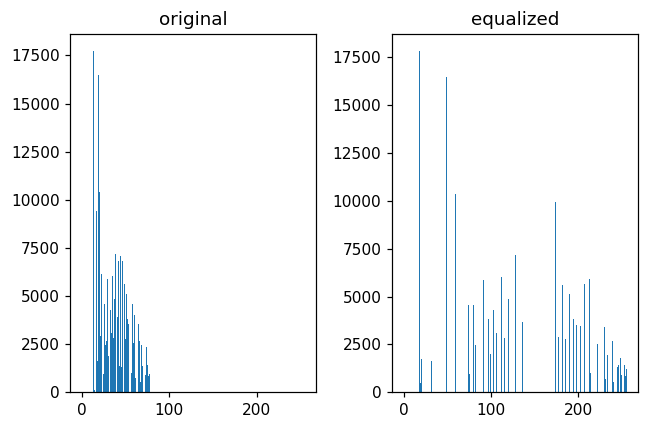

In [12]:
plt.figure(dpi=110)

plt.subplot(1, 2, 1)
plt.bar(range(len(out1_2[2])), out1_2[2])
plt.title('original')
plt.subplot(1, 2, 2)
plt.bar(range(len(out1_2[1])), out1_2[1])
plt.title('equalized')

plt.tight_layout()
plt.show()

In [50]:
cv2.imwrite('Q3_1_1_11910206.tif', out1_1[0])
cv2.imwrite('Q3_1_2_11910206.tif', out1_2[0])

True

## Histogram Match

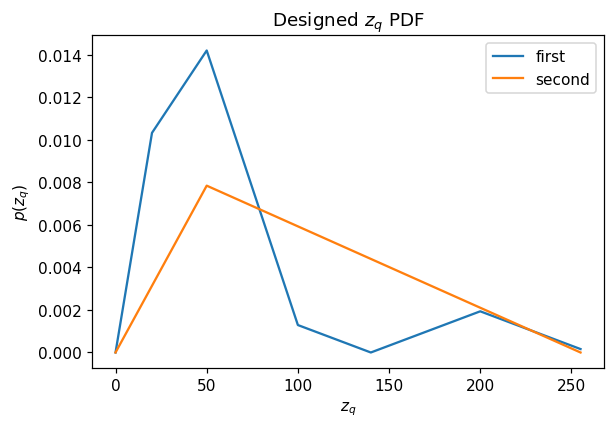

In [13]:
# design z_q

# design z_q
plt.figure(dpi=110)
z_q1 = np.zeros(256)
z_q1[:20] = 8 * np.arange(20)
z_q1[20:50] = 160 + 2 * np.arange(30)
z_q1[50:100] = 220 - 4 * np.arange(50)
z_q1[100:140] = 20 - 0.5 * np.arange(40)
z_q1[140:200] = 0.5 * np.arange(60)
z_q1[200:] = 30 - 0.5 * np.arange(56)

z_q1 = z_q1 / np.sum(z_q1)
plt.plot(z_q1, label='first')

z_q2 = np.zeros(256)
z_q2[:50] = 250 / 50 * np.arange(50)
z_q2[50:] = 250 - 250 / 205 * np.arange(206)

z_q2 = z_q2 / np.sum(z_q2)
plt.plot(z_q2, label='second')

plt.legend()
plt.title('Designed $z_q$ PDF')
plt.xlabel('$z_q$')
plt.ylabel('$p(z_q)$')
plt.show()

In [14]:
# Q3_2.tif

def hist_match(arr, spec_hist):
    """
    Implementation of histogram match (regulation)

    :param arr: the input image or array
    :param spec_hist: is a list containing a specified histogram of the input image (the designed z_q PDF)
    :return: matched array or image
    """
    input_hist = hist(arr.ravel())
    s_k = np.round(255 / np.sum(input_hist) * np.cumsum(input_hist))
    z_q2s_k = np.round(255 * np.cumsum(spec_hist))
    output_image = np.zeros_like(arr)
    for i in range(256):  # r -> s
        idx = np.where(s_k[i] <= z_q2s_k)[0][0]  # s -> z
        output_image[arr == i] = idx
    output_hist = hist(output_image.ravel())
    return output_image, output_hist, input_hist

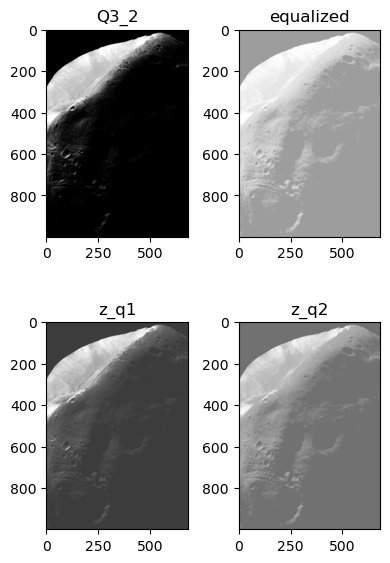

In [15]:
star1 = time()
out2_1 = hist_match(img2, z_q1)
end1 = time()
star2 = time()
out2_2 = hist_match(img2, z_q2)
end2 = time()

plt.figure(figsize=(4, 6), dpi=100)

plt.subplot(2, 2, 1)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.title('Q3_2')
plt.subplot(2, 2, 2)
plt.imshow(hist_equ(img2)[0], cmap='gray', vmin=0, vmax=255)
plt.title('equalized')
plt.subplot(2, 2, 3)
plt.imshow(out2_1[0], cmap='gray', vmin=0, vmax=255)
plt.title('z_q1')
plt.subplot(2, 2, 4)
plt.imshow(out2_2[0], cmap='gray', vmin=0, vmax=255)
plt.title('z_q2')

plt.tight_layout()
plt.show()

In [16]:
print('time:', end1 - star1)
print('time:', end2 - star2)

time: 0.6347625255584717
time: 0.62331223487854


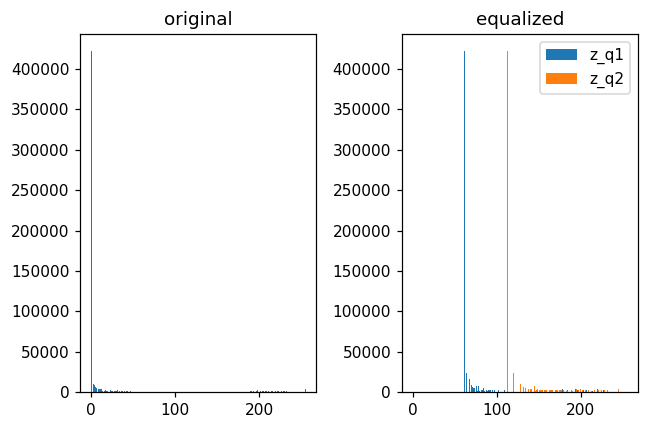

In [17]:
plt.figure(dpi=110)

plt.subplot(1, 2, 1)
plt.bar(range(len(out2_1[2])), out2_1[2])
plt.title('original')
plt.subplot(1, 2, 2)
plt.bar(range(len(out2_1[1])), out2_1[1], label='z_q1')
plt.bar(range(len(out2_2[1])), out2_2[1], label='z_q2')
plt.legend()
plt.title('equalized')

plt.tight_layout()
plt.show()

In [51]:
cv2.imwrite('Q3_2_11910206.tif', out2_1[0])

True

## Gamma Transform

In [18]:
def gamma_transform(arr, gamma):
    """
    do gamma transform

    :param arr: the input image or array
    :param gamma: the transform factor
    :return: the transformed image or array
    """
    gamma_img = np.round(np.power(arr / 255.0, gamma) * 255).astype(int)
    return gamma_img

## Local Statistic Adjustment

In [19]:
def local_statistic_adjust(arr, k0, k1, k2, k3, E, m_size=3):
    """
    do local statistic adjust

    :param arr: the input image or array
    :param k0: k0mG <= mSxy
    :param k1: mSxy <= k1mG
    :param k2: k2varG <= varSxy
    :param k3: varSxy <= k3varG
    :param E: adjust factor
    :param m_size: is the scale of the neighborhood size
    :return: the adjusted result
    """
    mG = np.average(arr)
    varG = np.var(arr)

    k0mG = k0 * mG
    k1mG = k1 * mG
    k2varG = k2 * varG
    k3varG = k3 * varG

    assert m_size % 2 == 1
    _s_half = m_size // 2
    _l_half = m_size // 2 + 1
    padded = np.pad(arr, (_s_half, _s_half))

    H = arr.shape[0]
    W = arr.shape[1]
    _H = H + 1
    _W = W + 1
    statistic_res = np.copy(arr)
    for i in range(_s_half, _H):
        for j in range(_s_half, _W):
            Sxy = padded[i - _s_half:i + _l_half, j - _s_half:j + _l_half]
            mSxy = np.average(Sxy)
            varSxy = np.var(Sxy)
            if k0mG <= mSxy <= k1mG and k2varG <= varSxy <= k3varG:
                statistic_res[i - 1, j - 1] *= E
    return statistic_res

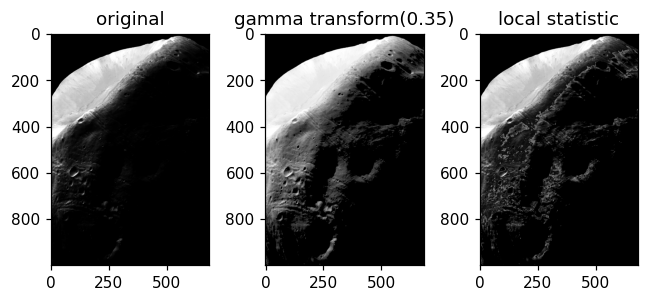

In [39]:
star1 = time()
out2_3 = gamma_transform(img2, 0.35)
end1 = time()
star2 = time()
out2_4 = local_statistic_adjust(img2, 0.02, 0.3, 0, 0.2, 15)
end2 = time()

plt.figure(dpi=110)

plt.subplot(1, 3, 1)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.title('original')
plt.subplot(1, 3, 2)
plt.imshow(out2_3, cmap='gray', vmin=0, vmax=255)
plt.title('gamma transform(0.35)')
plt.subplot(1, 3, 3)
plt.imshow(out2_4, cmap='gray', vmin=0, vmax=255)
plt.title('local statistic')

plt.tight_layout()
plt.show()

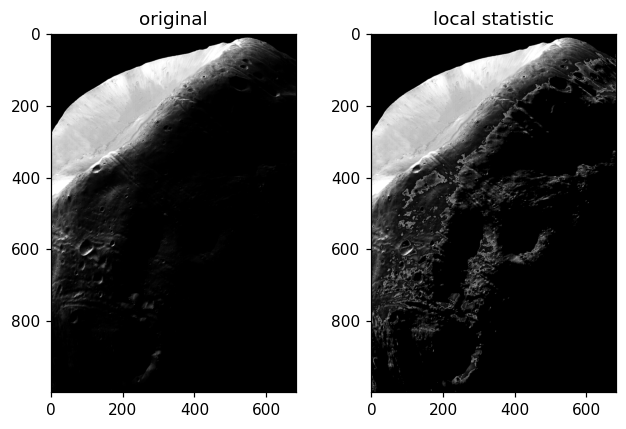

In [40]:
plt.figure(dpi=110)

plt.subplot(1, 2, 1)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.title('original')
plt.subplot(1, 2, 2)
plt.imshow(out2_4, cmap='gray', vmin=0, vmax=255)
plt.title('local statistic')

plt.tight_layout()
plt.show()

In [22]:
print('time:', end1 - star1)
print('time:', end2 - star2)

time: 0.032987356185913086
time: 19.913657426834106


## Local Histogram Equalization

In [23]:
def img2big_mat(arr, m_size, pad_mode='constant'):
    """
    calculate all the neighbors by iterating the array

    :param pad_mode: refer to definition of `np.pad`, 'edge', 'reflect', 'symmetric' are commonly used pad methods
    :param pad: whether pad the arr after m_size, default is yes
    :param arr: the input image or array
    :param m_size: is the scale of the neighborhood size
    :return: the padded arr, and a (pixel_cnt x m_size**2) size array contains all neighbors
    """

    _H = arr.shape[0]
    _W = arr.shape[1]
    assert _H >= m_size and _W >= m_size
    _half = m_size // 2
    _l_half = _half + 1
    _padded = np.pad(arr, (_half, _half), mode=pad_mode)
    big_mat = np.zeros((_H * _W, m_size * m_size))
    cnt = 0
    for i in range(_half, _H + _half):
        for j in range(_half, _W + _half):
            big_mat[cnt] = _padded[i - _half:i + _l_half, j - _half:j + _l_half].ravel()
            cnt += 1
    return _padded, big_mat

In [24]:
# Q3_3.tif

def local_hist_equ(arr, m_size):
    """
    Implementation of local histogram equalization

    :param arr: the input image or array
    :param m_size: is the scale of the neighborhood size
    :return: output_image, output_hist, input_hist
    """
    input_hist = hist(arr)
    _, _big_mat = img2big_mat(arr, m_size)
    output_image = hist_equ(_big_mat, local=True).reshape(arr.shape[0], arr.shape[1])
    output_hist = hist(output_image)
    return output_image, output_hist, input_hist

In [ ]:
# for i in range(s_half, _H, stride):
#     for j in range(s_half, _W, stride):
#         local_equalized[i - 1, j - 1] = hist_equalization(padded_img[i - s_half:i + l_half, j - s_half:j + l_half])[s_half, s_half]

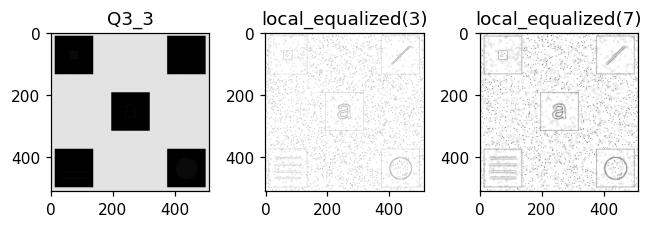

In [44]:
star1 = time()
out3_1 = local_hist_equ(img3, 3)
end1 = time()
star2 = time()
out3_2 = local_hist_equ(img3, 7)
end2 = time()

plt.figure(dpi=110)

plt.subplot(1, 3, 1)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.title('Q3_3')
plt.subplot(1, 3, 2)
plt.imshow(out3_1[0], cmap='gray', vmin=0, vmax=255)
plt.title('local_equalized(3)')
plt.subplot(1, 3, 3)
plt.imshow(out3_2[0], cmap='gray', vmin=0, vmax=255)
plt.title('local_equalized(7)')

plt.tight_layout()
plt.show()

In [45]:
print('time:', end1 - star1)
print('time:', end2 - star2)

time: 4.724057197570801
time: 9.002043008804321


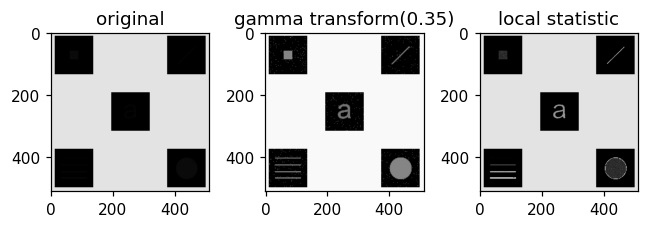

In [27]:
star1 = time()
out3_3 = gamma_transform(img3, 0.2)
end1 = time()
star2 = time()
out3_4 = local_statistic_adjust(img3, 0.02, 0.5, 0, 0.5, 30)
end2 = time()

plt.figure(dpi=110)

plt.subplot(1, 3, 1)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.title('original')
plt.subplot(1, 3, 2)
plt.imshow(out3_3, cmap='gray', vmin=0, vmax=255)
plt.title('gamma transform(0.35)')
plt.subplot(1, 3, 3)
plt.imshow(out3_4, cmap='gray', vmin=0, vmax=255)
plt.title('local statistic')

plt.tight_layout()
plt.show()

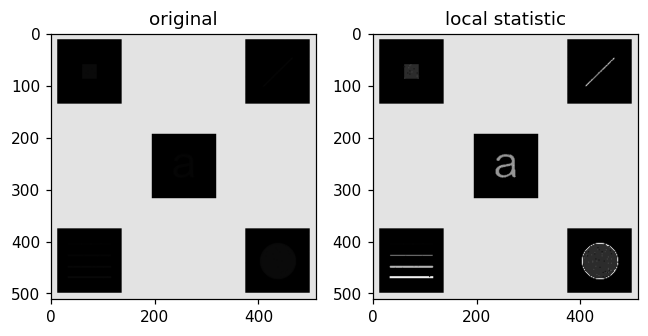

In [41]:
plt.figure(dpi=110)

plt.subplot(1, 2, 1)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.title('original')
plt.subplot(1, 2, 2)
plt.imshow(out3_4, cmap='gray', vmin=0, vmax=255)
plt.title('local statistic')

plt.tight_layout()
plt.show()

In [28]:
print('time:', end1 - star1)
print('time:', end2 - star2)

time: 0.01899552345275879
time: 7.763407468795776


In [62]:
buffer = out3_2[0].astype(int)
cv2.imwrite('Q3_3_11910206.tif', buffer)

True

## Reduce SAP

In [29]:
def order_filter(arr, n_size, pad_mode='constant'):
    """
    Implement order statistic filter (median-value filter)

    :param arr: the input image or array
    :param n_size: is the scale of the filter size
    :param pad_mode: refer to `np.pad`
    :return: result of order filtering
    """
    assert n_size % 2 == 1  # only handel odd kernel
    _H = arr.shape[0]
    _W = arr.shape[1]
    _half = n_size // 2
    _l_half = _half + 1
    padded = np.pad(arr, (_half, _half), mode=pad_mode)
    order_filtered = np.zeros_like(arr)
    for i in range(_half, _H):
        for j in range(_half, _W):
            order_filtered[i - 1, j - 1] = np.median(padded[i - _half:i + _l_half, j - _half:j + _l_half])
    return order_filtered

In [30]:
def linear_filter(arr, box_size=0, kernel=None, pad_mode='constant'):
    if box_size != 0:
        kernel = 1 / (box_size ** 2) * np.ones((box_size, box_size))
    else:
        assert kernel is not None

    _H = arr.shape[0]
    _W = arr.shape[1]
    _kernel_size = kernel.shape[0]
    _half = _kernel_size // 2
    _l_half = _half + 1
    _, arr_big = img2big_mat(arr, _kernel_size, pad_mode=pad_mode)
    linear_filtered = (arr_big @ kernel.ravel()).reshape(_H, _W)
    return linear_filtered

In [31]:
def gaussian_filter(arr, sigma, K, pad_mode='constant'):
    _kernel_size = np.ceil(6 * sigma).astype(int)
    _H = arr.shape[0]
    _W = arr.shape[1]
    if _kernel_size % 2 == 0:
        _kernel_size += 1

    # get the distance matrix
    R_gen_size = (_kernel_size - 1) // 2
    R_gen_row = np.arange(1, R_gen_size + 1) ** 2
    R_gen = np.zeros((R_gen_size, R_gen_size))
    for i in range(1, R_gen_size + 1):
        R_gen[i - 1] = R_gen_row + R_gen_row[i - 1]
    R_right = np.vstack((np.flipud(R_gen), R_gen_row, R_gen))
    R_mid = np.r_[np.flip(R_gen_row), [0], R_gen_row]
    R_left = np.fliplr(R_right)
    R = np.hstack((R_left, R_mid.reshape(_kernel_size, 1), R_right))

    # generate coefficient w
    G = K * np.exp(-R / (2 * sigma ** 2))
    kernel = 1 / np.sum(G) * G

    assert _kernel_size % 2 == 1  # only handel odd kernel
    gaussian_filtered = linear_filter(arr, kernel=kernel, pad_mode=pad_mode)
    return gaussian_filtered

In [32]:
star1 = time()
out4_1 = order_filter(img4, 3)
end1 = time()
star2 = time()
out4_2 = order_filter(img4, 7)
end2 = time()
star3 = time()
out4_3 = linear_filter(img4, box_size=3)
end3 = time()
star4 = time()
out4_4 = linear_filter(img4, box_size=7)
end4 = time()
star5 = time()
out4_5 = gaussian_filter(img4, 2.5, 1)
end5 = time()
star6 = time()
out4_6 = gaussian_filter(img4, 5, 1)
end6 = time()
star7 = time()
out4_7 = gaussian_filter(img4, 5, 1, pad_mode='reflect')
end7 = time()

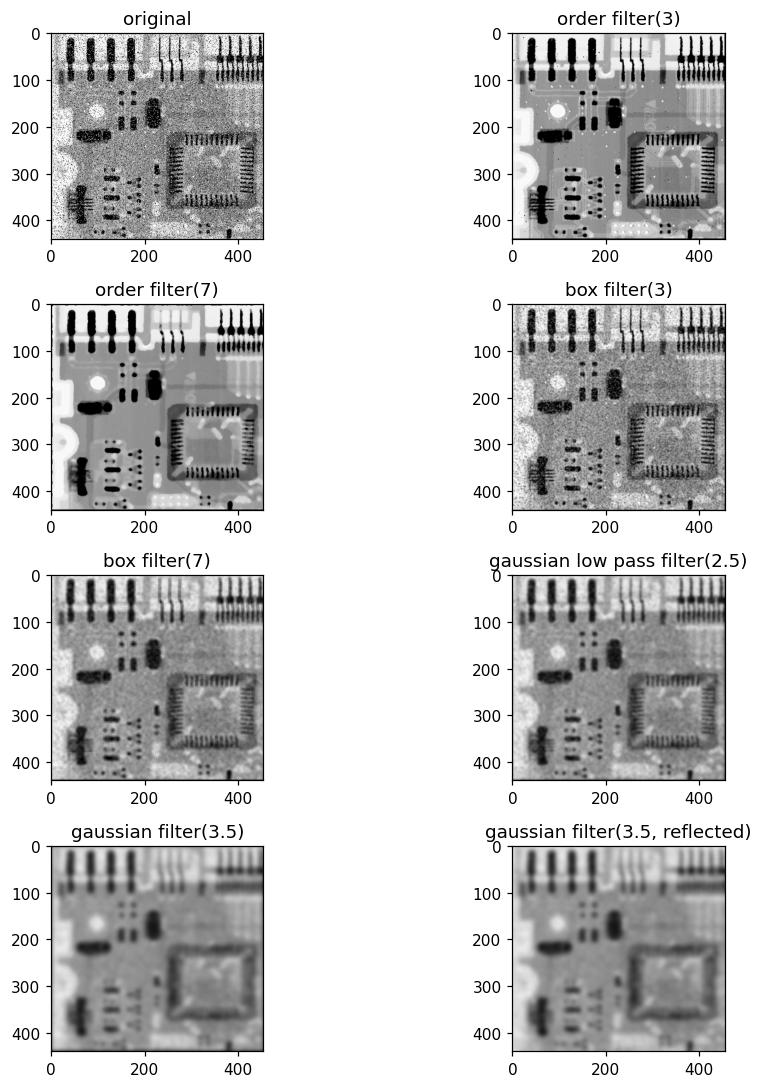

In [33]:
plt.figure(figsize=(10, 10), dpi=110)

plt.subplot(4, 2, 1)
plt.imshow(img4, cmap='gray', vmin=0, vmax=255)
plt.title('original')
plt.subplot(4, 2, 2)
plt.imshow(out4_1, cmap='gray', vmin=0, vmax=255)
plt.title('order filter(3)')
plt.subplot(4, 2, 3)
plt.imshow(out4_2, cmap='gray', vmin=0, vmax=255)
plt.title('order filter(7)')
plt.subplot(4, 2, 4)
plt.imshow(out4_3, cmap='gray', vmin=0, vmax=255)
plt.title('box filter(3)')
plt.subplot(4, 2, 5)
plt.imshow(out4_4, cmap='gray', vmin=0, vmax=255)
plt.title('box filter(7)')
plt.subplot(4, 2, 6)
plt.imshow(out4_5, cmap='gray', vmin=0, vmax=255)
plt.title('gaussian low pass filter(2.5)')
plt.subplot(4, 2, 7)
plt.imshow(out4_6, cmap='gray', vmin=0, vmax=255)
plt.title('gaussian filter(3.5)')
plt.subplot(4, 2, 8)
plt.imshow(out4_7, cmap='gray', vmin=0, vmax=255)
plt.title('gaussian filter(3.5, reflected)')

plt.tight_layout()
plt.show()

In [34]:
print('time:', end1 - star1)
print('time:', end2 - star2)
print('time:', end3 - star3)
print('time:', end4 - star4)
print('time:', end5 - star5)
print('time:', end6 - star6)
print('time:', end7 - star7)

time: 3.73285174369812
time: 3.608351707458496
time: 0.29807138442993164
time: 0.4164392948150635
time: 0.4878067970275879
time: 0.813880443572998
time: 0.8729896545410156


In [65]:
cv2.imwrite('Q3_4_11910206.tif', out4_2)

True